In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


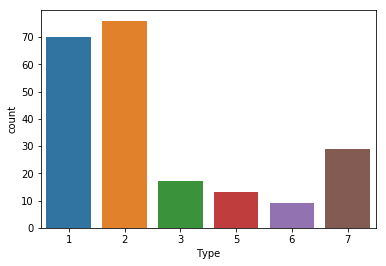

In [32]:
sns.countplot(data['Type'])
plt.show()

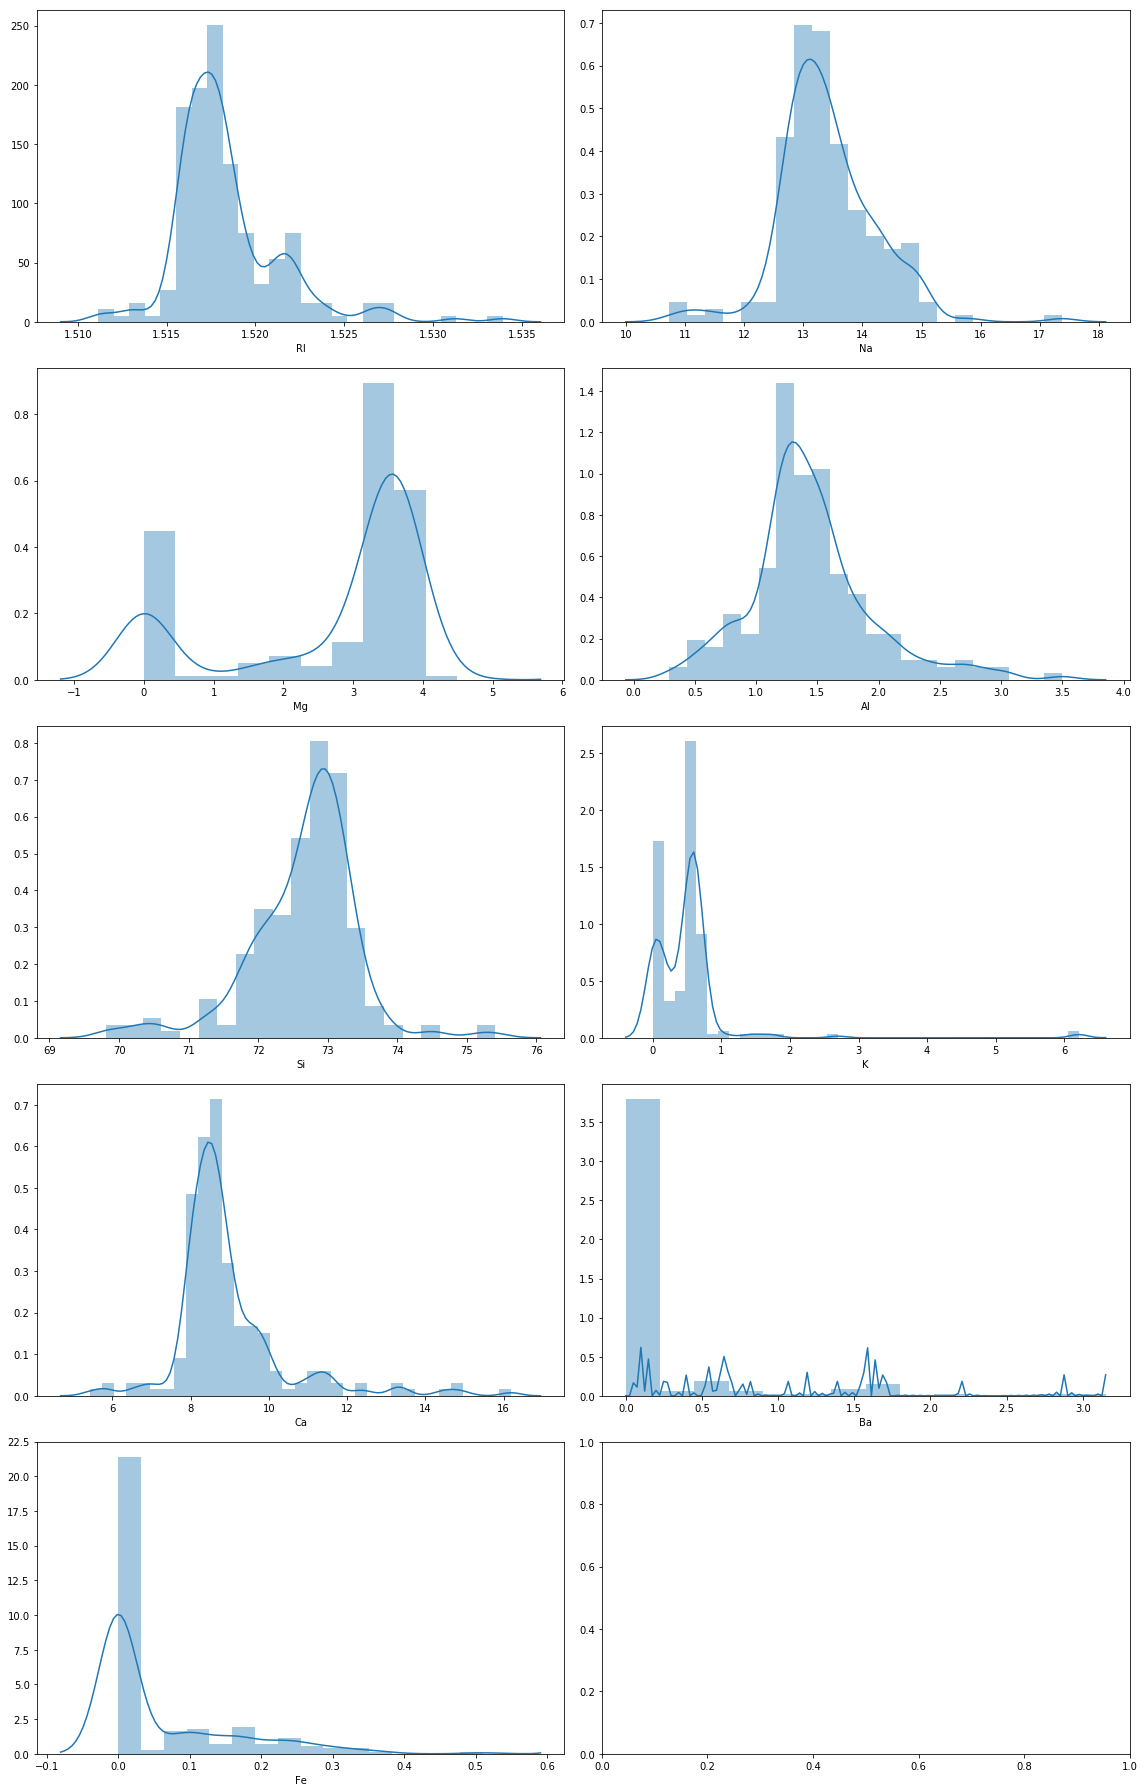

In [33]:
fig,ax = plt.subplots(5,2,figsize=(16,25))
ax = ax.flatten()
for i,col in enumerate(data.columns[:-1]):
    sns.distplot(data[col],ax=ax[i])
plt.tight_layout()
plt.show()

Extracting Independent and Dependent variables

In [35]:
x = data.drop('Type',axis=1)
y = data['Type']

Splitting into train and test data set:

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=0)

Scaling the independent variables which are all numerical columns

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [63]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Random Forest

In [54]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(xtrain,ytrain)

C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [55]:
rf_pred = rf_model.predict(xtest)
accuracy_score(ytest, rf_pred)

0.676923076923077

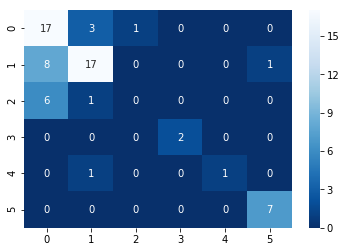

In [57]:
rf_cm = confusion_matrix(ytest, rf_pred)
sns.heatmap(rf_cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

In [58]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           1       0.55      0.81      0.65        21
           2       0.77      0.65      0.71        26
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.88      1.00      0.93         7

    accuracy                           0.68        65
   macro avg       0.70      0.66      0.66        65
weighted avg       0.64      0.68      0.65        65



### Bagging

In [59]:
bag_model = BaggingClassifier(DecisionTreeClassifier(random_state=1))
bag_model.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [60]:
bag_pred = bag_model.predict(xtest)
accuracy_score(ytest, bag_pred)

0.6461538461538462

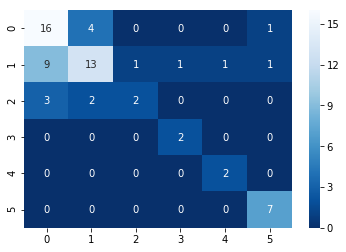

In [61]:
bag_cm = confusion_matrix(ytest, bag_pred)
sns.heatmap(bag_cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

In [62]:
print(classification_report(ytest,bag_pred))

              precision    recall  f1-score   support

           1       0.57      0.76      0.65        21
           2       0.68      0.50      0.58        26
           3       0.67      0.29      0.40         7
           5       0.67      1.00      0.80         2
           6       0.67      1.00      0.80         2
           7       0.78      1.00      0.88         7

    accuracy                           0.65        65
   macro avg       0.67      0.76      0.68        65
weighted avg       0.65      0.65      0.63        65



### AdaBoost

In [68]:
ab_model = AdaBoostClassifier(random_state=1)
ab_model.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [69]:
ab_pred = ab_model.predict(xtest)
accuracy_score(ytest, ab_pred)

0.49230769230769234

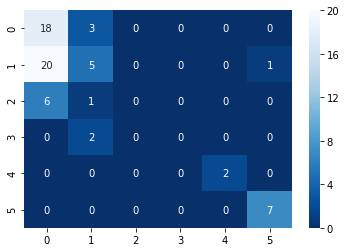

In [70]:
ab_cm = confusion_matrix(ytest, ab_pred)
sns.heatmap(ab_cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

In [71]:
print(classification_report(ytest,ab_pred))

              precision    recall  f1-score   support

           1       0.41      0.86      0.55        21
           2       0.45      0.19      0.27        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       0.88      1.00      0.93         7

    accuracy                           0.49        65
   macro avg       0.46      0.51      0.46        65
weighted avg       0.44      0.49      0.42        65



C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Gradient Boosting

In [72]:
gb_model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gb_model.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
gb_pred = gb_model.predict(xtest)
accuracy_score(ytest, gb_pred)

0.6

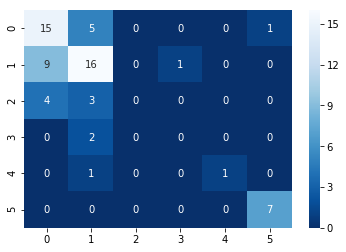

In [74]:
gb_cm = confusion_matrix(ytest, gb_pred)
sns.heatmap(gb_cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

In [75]:
print(classification_report(ytest,gb_pred))

              precision    recall  f1-score   support

           1       0.54      0.71      0.61        21
           2       0.59      0.62      0.60        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       1.00      0.50      0.67         2
           7       0.88      1.00      0.93         7

    accuracy                           0.60        65
   macro avg       0.50      0.47      0.47        65
weighted avg       0.54      0.60      0.56        65



C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
